# Level_2&3_(1,2,3,4)_Tasks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/bhavesh/Downloads/Dataset .csv')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
print(df.shape)

(9551, 21)


In [5]:
print(df.columns.tolist())

['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


In [6]:
print(df.dtypes)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [7]:
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [8]:
duplicates = df.duplicated().sum()
print(duplicates)

0


# Task 1 : Restaurant Ratings

## 1.1 Analyze the distribution of aggregate ratings and determine the most common rating range.

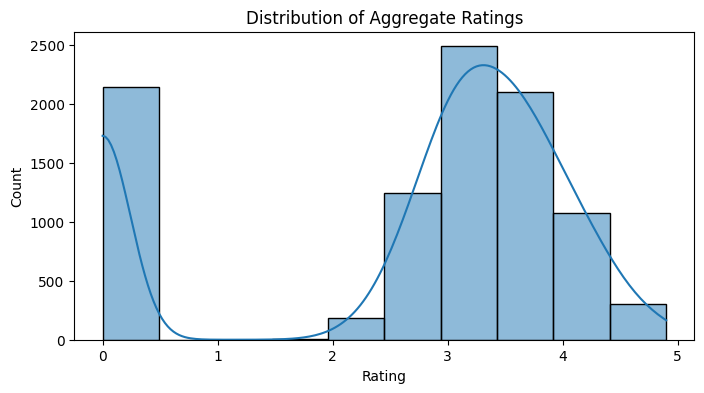

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [10]:
rating_bins = [0, 1, 2, 3, 4, 5]
rating_labels = ['0–1', '1–2', '2–3', '3–4', '4–5']

df['Rating Range'] = pd.cut(df['Aggregate rating'], bins=rating_bins, labels=rating_labels, include_lowest=True)


In [11]:
rating_range_counts = df['Rating Range'].value_counts().sort_index()

print("Rating Range Counts:")
print(rating_range_counts)


Rating Range Counts:
Rating Range
0–1    2148
1–2      10
2–3    1891
3–4    4388
4–5    1114
Name: count, dtype: int64


In [12]:
most_common_range = rating_range_counts.idxmax()
most_common_count = rating_range_counts.max()

print("Most common rating range:", most_common_range)
print("Number of restaurants in this range:", most_common_count)


Most common rating range: 3–4
Number of restaurants in this range: 4388


- The distribution of aggregate ratings shows that most restaurants fall in the **[3-4]** rating range.

## 1.2 Calculate the average number of votes received by restaurants.

In [13]:
average_votes = df['Votes'].mean()

print("Average Number of Votes Received by Restaurants:", round(average_votes, 2))

Average Number of Votes Received by Restaurants: 156.91


# Task 2 : Cuisine Combination

# 2.1 Identify the most common combinations of cuisines in the dataset.

In [14]:
cuisine_combos = df['Cuisines'].value_counts()
print("Most Common Cuisine Combinations:")
print(cuisine_combos.head(10))

Most Common Cuisine Combinations:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


- The most frequent cuisine combination is **[North Indian]**, appearing **[936]** times in the dataset.

## 2.2 Determine if certain cuisine combinations tend to have higher ratings.

In [15]:
avg_rating_by_combo = (
    df.groupby('Cuisines')['Aggregate rating']
      .mean()
      .round(2)
      .sort_values(ascending=False)
)

print("Average Rating by Cuisine Combination:")
print(avg_rating_by_combo.head(10)) 

Average Rating by Cuisine Combination:
Cuisines
American, Sandwich, Tea         4.9
Hawaiian, Seafood               4.9
European, Asian, Indian         4.9
European, Contemporary          4.9
European, German                4.9
Italian, Deli                   4.9
BBQ, Breakfast, Southern        4.9
American, Coffee and Tea        4.9
Sunda, Indonesian               4.9
American, Caribbean, Seafood    4.9
Name: Aggregate rating, dtype: float64


In [16]:
print(avg_rating_by_combo.tail(10)) 

Cuisines
Italian, Chinese                                 0.0
Indian, Persian                                  0.0
Pizza, Burger, Fast Food                         0.0
Continental, Italian, Fast Food                  0.0
Ice Cream, Bakery                                0.0
Hyderabadi, Biryani                              0.0
Pizza, Fast Food, Bakery                         0.0
Pizza, Ice Cream                                 0.0
Greek, Mediterranean, Middle Eastern             0.0
Italian, Continental, Fast Food, North Indian    0.0
Name: Aggregate rating, dtype: float64


# Task 3 : Restaurant Chains
## 3.1 Identify if there are any restaurant chains present in the dataset.

In [17]:
restaurant_counts = df['Restaurant Name'].value_counts()

restaurant_chains = restaurant_counts[restaurant_counts > 1]

restaurant_chains

Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64

- Restaurants that appear more than once indicate multiple branches and therefore represent *restaurant chains*.

## 3.2 Analyze the ratings and popularity ofdifferent restaurant chains.

In [18]:
restaurant_counts = df['Restaurant Name'].value_counts()

chains = restaurant_counts[restaurant_counts > 1].index

chains[:10]

Index(['Cafe Coffee Day', 'Domino's Pizza', 'Subway', 'Green Chick Chop',
       'McDonald's', 'Keventers', 'Pizza Hut', 'Giani', 'Baskin Robbins',
       'Barbeque Nation'],
      dtype='object', name='Restaurant Name')

In [19]:
chain_df = df[df['Restaurant Name'].isin(chains)]
chain_df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Rating Range
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,No,No,No,No,3,4.4,Green,Very Good,336,4–5
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",...,No,No,No,No,3,4.9,Dark Green,Excellent,1070,4–5
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",...,No,No,No,No,3,4.8,Dark Green,Excellent,294,4–5
35,6601589,Coco Bambu,30,Bras�_lia,"Bras�_lia Shopping - Piso 2, SCN 5, Bloco A, A...","Bras�_lia Shopping, Asa Norte","Bras�_lia Shopping, Asa Norte, Bras�_lia",-47.889000,-15.786500,International,...,No,No,No,No,4,4.2,Green,Very Good,17,4–5
39,6600427,Coco Bambu,30,Bras�_lia,"SCES, Trecho 2, Conjunto 13/36, Setor de Clube...",Setor De Clubes Esportivos Sul,"Setor De Clubes Esportivos Sul, Bras�_lia",-47.868500,-15.819000,International,...,No,No,No,No,4,4.9,Dark Green,Excellent,30,4–5


In [20]:
chain_stats = (
    chain_df.groupby("Restaurant Name")
            .agg(
                Avg_Rating=("Aggregate rating", "mean"),
                Total_Votes=("Votes", "sum"),
                Branch_Count=("Restaurant Name", "count")
            )
            .sort_values(by="Avg_Rating", ascending=False)
)

chain_stats.round(2).head(10)

,Avg_Rating,Total_Votes,Branch_Count
Restaurant Name,,,
Talaga Sampireun,4.90,5514,3
Silantro Fil-Mex,4.85,1364,2
AB's Absolute Barbecues,4.85,3151,2
AB's - Absolute Barbecues,4.82,13400,4
Naturals Ice Cream,4.80,3094,2
Gymkhana,4.70,328,2
The Cheesecake Factory,4.65,3010,2
Dishoom,4.60,1269,2
Garota de Ipanema,4.60,59,2


- The highest-rated chains include **[Talaga Sampireun]**, **[Silantro Fil-Mex]**, and **[AB's Absolute Barbecues]**, all with strong customer satisfaction.

# LEVEL 3 
## TASK 1 : Votes Analysis

## 1.1 Identify the restaurants with the highest and lowest number of votes.

In [21]:
sorted_votes = df.sort_values(by="Votes", ascending=False)

highest_votes = sorted_votes.iloc[0]

lowest_votes = sorted_votes[sorted_votes["Votes"] > 0].iloc[-1]

print(highest_votes)

Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                                 2000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                      No
Has Online delivery                   

In [22]:
print(lowest_votes)

Restaurant ID                                                    18273067
Restaurant Name                    Curry Capital - Hotel Classic Diplomat
Country Code                                                            1
City                                                            New Delhi
Address                 A-4, NH 8, Near IGI Airport, Mahipalpur, New D...
Locality                               Hotel Classic Diplomat, Mahipalpur
Locality Verbose            Hotel Classic Diplomat, Mahipalpur, New Delhi
Longitude                                                        77.12618
Latitude                                                        28.547656
Cuisines                 North Indian, Continental, South Indian, Chinese
Average Cost for two                                                 1000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                     Yes
Has Online delivery                   

- The restaurant with the **highest popularity** (most votes) is **[Toit]** with **[10934] votes**, showing strong customer engagement.
- The restaurant with the **lowest (non-zero) votes** is **[Curry Capital - Hotel Classic Diplomat]** with **[1] votes**, indicating low visibility or limited customer interactions.

## 1.2 Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [23]:
correlation = df['Votes'].corr(df['Aggregate rating'])

correlation

0.31369058419541146

- The correlation coefficient between **votes** and **ratings** is **[0.31]**.
- A **positive correlation** suggests that restaurants with more votes tend to have higher ratings, meaning popular restaurants may also be well-rated.

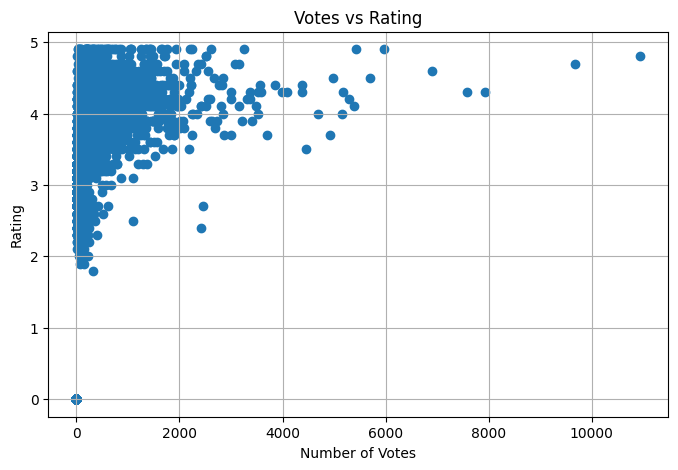

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(df['Votes'], df['Aggregate rating'])
plt.title("Votes vs Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.grid(True)
plt.show()


## Task 2 : Price Range vs. Online Delivery and Table Booking
## 2.1 Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [25]:
df['Online_delivery_binary'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Table_booking_binary'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})


In [26]:
online_by_price = df.groupby('Price range')['Online_delivery_binary'].mean()

(online_by_price.round(2))*100


Price range
1    16.0
2    41.0
3    29.0
4     9.0
Name: Online_delivery_binary, dtype: float64

In [27]:
table_by_price = df.groupby('Price range')['Table_booking_binary'].mean()

table_by_price.round(2)*100


Price range
1     0.0
2     8.0
3    46.0
4    47.0
Name: Table_booking_binary, dtype: float64

<Axes: title={'center': 'Online Delivery Availability by Price Range'}, xlabel='Price range'>

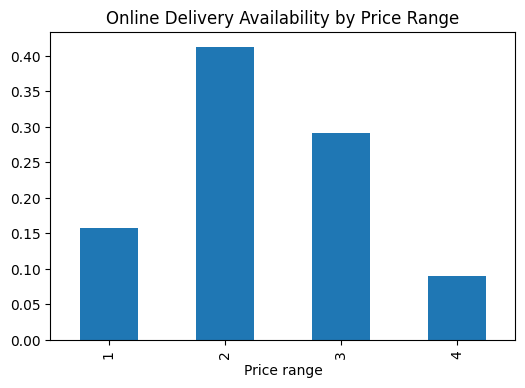

In [28]:
online_by_price.plot(kind='bar', figsize=(6,4), title="Online Delivery Availability by Price Range")


<Axes: title={'center': 'Table Booking Availability by Price Range'}, xlabel='Price range'>

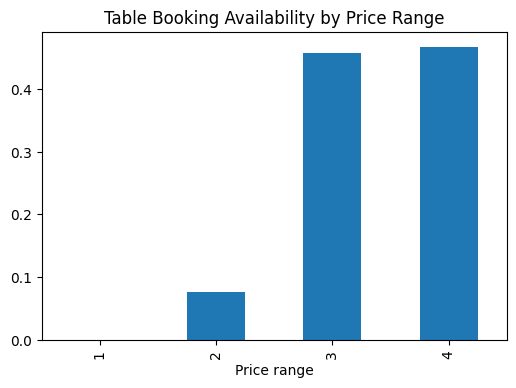

In [29]:
table_by_price.plot(kind='bar', figsize=(6,4), title="Table Booking Availability by Price Range")


In [30]:
corr_delivery = df['Price range'].corr(df['Online_delivery_binary'])
corr_table = df['Price range'].corr(df['Table_booking_binary'])

corr_delivery, corr_table


(0.07791776880448596, 0.5019247250371413)

**Online Delivery**
- Higher price ranges tend to have **[higher]** online delivery availability.
- Price Range **[2]** has the highest percentage of restaurants offering online delivery.

**Table Booking**
- Table booking shows a **[0.50] correlation** with price range.
- Premium restaurants (higher price range) are **more likely** to offer table booking.

In [31]:

df['Online_delivery_binary'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Table_booking_binary'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})


online_delivery_rate = df.groupby('Price range')['Online_delivery_binary'].mean() * 100
table_booking_rate = df.groupby('Price range')['Table_booking_binary'].mean() * 100

online_delivery_rate, table_booking_rate


(Price range
 1    15.774077
 2    41.310633
 3    29.190341
 4     9.044369
 Name: Online_delivery_binary, dtype: float64,
 Price range
 1     0.022502
 2     7.677482
 3    45.738636
 4    46.757679
 Name: Table_booking_binary, dtype: float64)

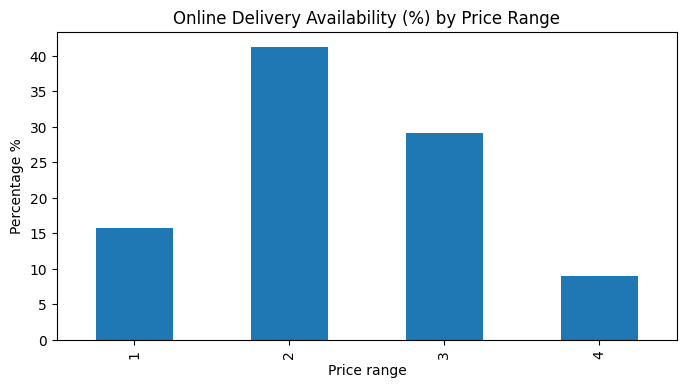

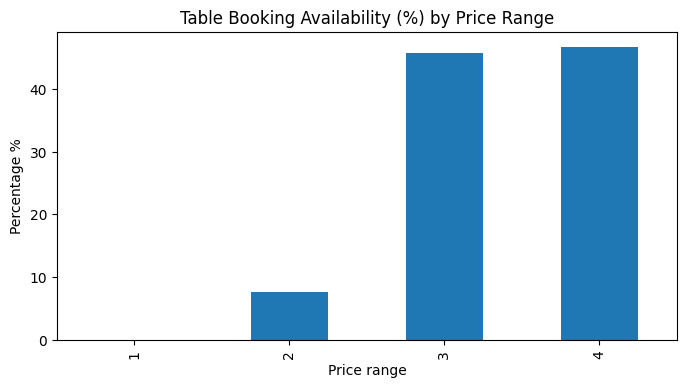

In [32]:
plt.figure(figsize=(8,4))
online_delivery_rate.plot(kind='bar')
plt.title("Online Delivery Availability (%) by Price Range")
plt.ylabel("Percentage %")
plt.show()

plt.figure(figsize=(8,4))
table_booking_rate.plot(kind='bar')
plt.title("Table Booking Availability (%) by Price Range")
plt.ylabel("Percentage %")
plt.show()

## 